In [6]:
# This code analyzes the time delay between the two channels calculated using the GCC-PHAT function
# for different directions of the sound source (0 - 360 azimuth angle)

import os
import matplotlib.pyplot as plt
import numpy as np
import librosa
import wave
import librosa as lr
from scipy import signal
from scipy.fftpack import fft,fft2, fftshift, ifft
import math
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn import preprocessing
import librosa.display

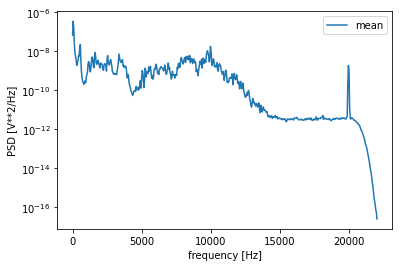

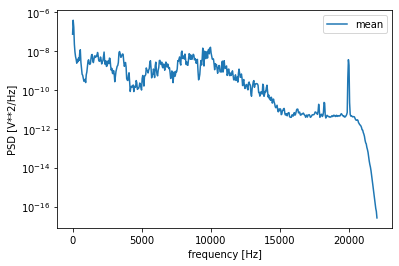

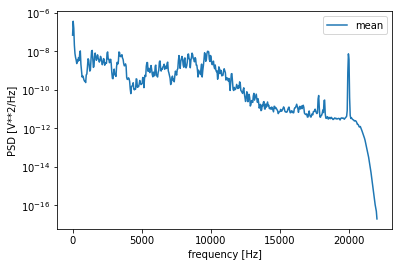

In [26]:
# # 
def PowerSpectralDensity(sig1, fs=1, max_tau=None, interp=16):
    f, Pxx_den = signal.welch(sig1, fs, nperseg=1024)
              
    plt.semilogy(f, Pxx_den, label='mean')

    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.legend()
    plt.show()

if __name__ == "__main__":
        #  Read the audio files
    ch1, sfreq = lr.load("ch1.wav", sr = 44100)
    ch2, sfreq = lr.load("ch2.wav", sr = 44100)
    ch3, sfreq = lr.load("ch3.wav", sr = 44100)
    RawAudio, sfreq =  lr.load("AUGUST_1_raw.wav", sr=44100)

    PowerSpectralDensity(ch1,fs=sfreq)
    PowerSpectralDensity(ch2,fs=sfreq)
    PowerSpectralDensity(ch3,fs=sfreq)
    

In [3]:
ch1, sfreq = lr.load("ch1.wav", sr = 44100)
ch2, sfreq = lr.load("ch2.wav", sr = 44100)
ch3, sfreq = lr.load("ch3.wav", sr = 44100)

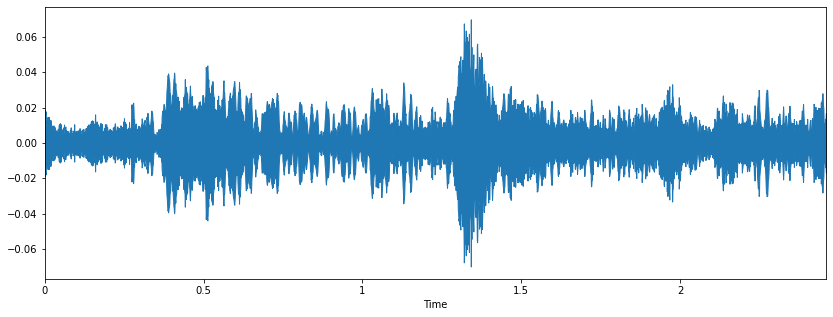

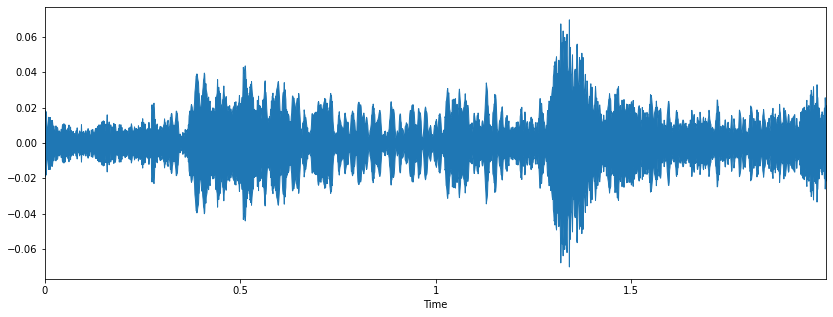

In [8]:
#### Display waveform ####
x=ch1
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sfreq)
plt.show()

x_fixedLength = librosa.util.fix_length(x, 2*sfreq)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x_fixedLength, sr=sfreq)
plt.show()

In [ ]:
#### Zooming in to find zero crossing ####
n0 = 0
n1 = 200
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

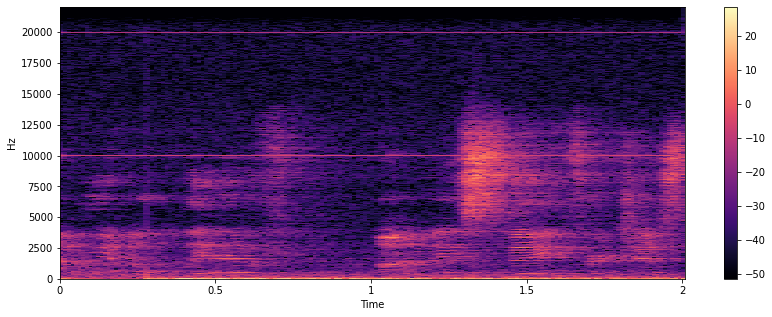

In [15]:
#### Display spectrogram ####
X = librosa.stft(x_fixedLength)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sfreq, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

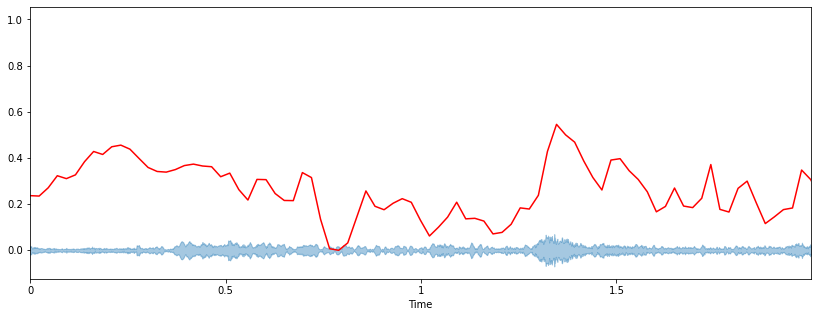

In [16]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
spectral_centroids = librosa.feature.spectral_centroid(x_fixedLength, sr=sfreq)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x_fixedLength, sr=sfreq, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

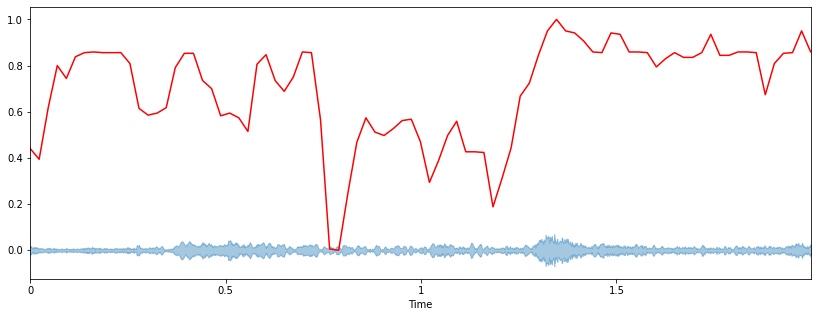

In [18]:
#### Spectral roll off
spectral_rolloff = librosa.feature.spectral_rolloff(x_fixedLength, sr=sfreq)[0]
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x_fixedLength, sr=sfreq, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.show()


(20, 173)


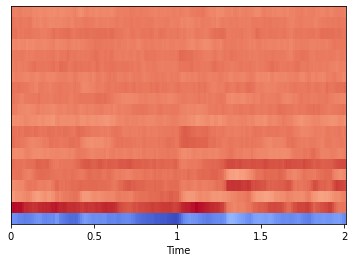

In [21]:
#### MFCC features ####
mfccs = librosa.feature.mfcc(x_fixedLength, sr=sfreq)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sfreq, x_axis='time')
plt.show()

In [ ]:
################################### ZERO MEAN SIGNAL ####################################

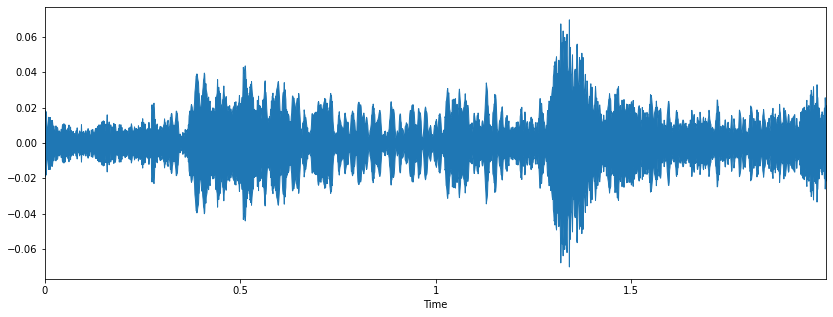

The mean of the signal is:  0.0055394107


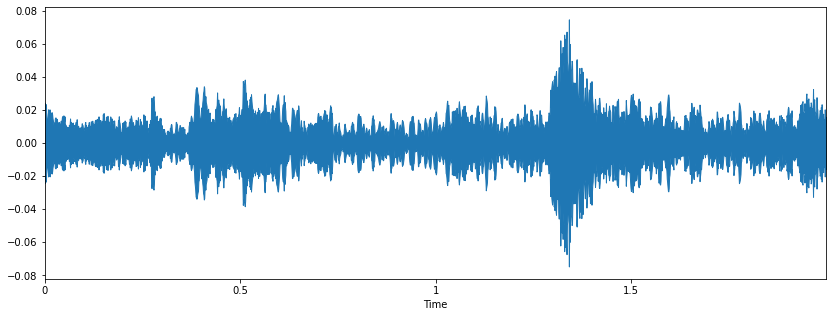

In [29]:
ch1, sfreq = lr.load("ch1.wav", sr = 44100)
ch2, sfreq = lr.load("ch2.wav", sr = 44100)
ch3, sfreq = lr.load("ch3.wav", sr = 44100)

#### Display waveform ####
x=ch1

x_fixedLength = librosa.util.fix_length(x, 2*sfreq)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x_fixedLength, sr=sfreq)
plt.show()

x_ZeroMean=x_fixedLength-np.mean(x_fixedLength)
print("The mean of the signal is: ", np.mean(x_fixedLength))

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x_ZeroMean, sr=sfreq)
plt.show()

In [30]:
# Calculate the variance of the signal
Variance = np.var(x_ZeroMean, dtype=np.float64)
print("The variance of the signal is: ", Variance)

The variance of the signal is:  9.668677027913541e-05


[210, 90, 240, 30, 270, 150, 180, 120, 0, 300, 330, 60]
[0.28867514 0.28867514 0.28867513 0.28867513 0.28867514 0.28867513
 0.28867513 0.28867513 0.28867514 0.28867514 0.28867513 0.28867513]
[0.28867513 0.28867514 0.28867513 0.28867514 0.28867514 0.28867513
 0.28867514 0.28867513 0.28867513 0.28867513 0.28867513 0.28867514]
[0.28867514 0.28867514 0.28867513 0.28867514 0.28867513 0.28867513
 0.28867514 0.28867514 0.28867514 0.28867514 0.28867514 0.28867513]
[0.28867513 0.28867513 0.28867513 0.28867513 0.28867513 0.28867513
 0.28867513 0.28867513 0.28867513 0.28867513 0.28867513 0.28867513]


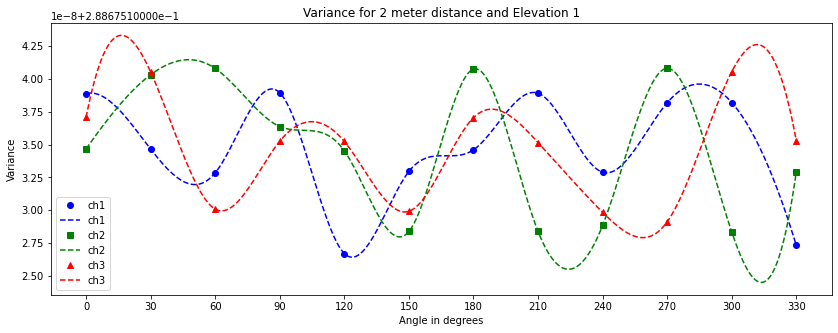

In [48]:
# For 2 Meter Elevation 1

directorySound_content = os.listdir("/home/prabhjot/Desktop/SoundData/OaklandU_Bridge")
directorySound = os.fsencode("/home/prabhjot/Desktop/SoundData/OaklandU_Bridge")

index = directorySound_content.index('2Meter_Elevation1')
_2MeterFolderPathElv1 = (os.path.join(directorySound.decode("utf-8"),directorySound_content[index] ))

_2MeterFolderPathElv1_content = os.listdir(_2MeterFolderPathElv1)

Angle = []
ch1_Var = []
ch2_Var = []
ch3_Var = []
RawAudio_Var = []

for i in range(0,len(_2MeterFolderPathElv1_content)):
    subdir = (os.path.join(_2MeterFolderPathElv1,_2MeterFolderPathElv1_content[i]))
    #print(subdir)
    with open(os.path.join(subdir,'angle.txt')) as f:
        read_data = f.read()
    Angle.append(int(read_data[0:-1]))
    
    #Read the audio files
    ch1, sfreq = lr.load(os.path.join(subdir, 'ch1.wav'), sr=44100)
    ch2, sfreq = lr.load(os.path.join(subdir, 'ch2.wav'), sr=44100)
    ch3, sfreq = lr.load(os.path.join(subdir, 'ch3.wav'), sr=44100)
    RawAudio, sfreq =  lr.load("AUGUST_1_raw.wav", sr=44100)
       
    ###### Change to signal to a fixed length of 2sec
    ch1_fixedLength = librosa.util.fix_length(ch1, 2*sfreq)
    ch2_fixedLength = librosa.util.fix_length(ch2, 2*sfreq)
    ch3_fixedLength = librosa.util.fix_length(ch3, 2*sfreq)
    RawAudio_fixedLength = librosa.util.fix_length(RawAudio, 2*sfreq)

    ###### Convert the signal to a Zero mean signal
    ch1_ZeroMean=x_fixedLength-np.mean(ch1_fixedLength)
    ch2_ZeroMean=x_fixedLength-np.mean(ch2_fixedLength)
    ch3_ZeroMean=x_fixedLength-np.mean(ch3_fixedLength)
    RawAudio_ZeroMean=x_fixedLength-np.mean(RawAudio_fixedLength)
        
    ###### Calculate variance for the Zero mean signal
    ch1_Variance = np.var(ch1_ZeroMean, dtype=np.float64)
    ch2_Variance = np.var(ch2_ZeroMean, dtype=np.float64)
    ch3_Variance = np.var(ch3_ZeroMean, dtype=np.float64)
    RawAudio_Variance = np.var(RawAudio_ZeroMean, dtype=np.float64)
    
    ch1_Var.append(ch1_Variance)
    ch2_Var.append(ch2_Variance)
    ch3_Var.append(ch3_Variance)
    RawAudio_Var.append(RawAudio_Variance)
    
##### Normlaize the Variance vector
ch1_Var =  preprocessing.normalize([ch1_Var])
ch2_Var =  preprocessing.normalize([ch2_Var])
ch3_Var =  preprocessing.normalize([ch3_Var])
RawAudio_Var =  preprocessing.normalize([RawAudio_Var])
ch1_Var =  ch1_Var[0]
ch2_Var =  ch2_Var[0]
ch3_Var =  ch3_Var[0]
RawAudio_Var =  RawAudio_Var[0]

print(Angle)
print(ch1_Var)
print(ch2_Var)
print(ch3_Var)
print(RawAudio_Var)

plt.figure(figsize=(14, 5))
ch1_Var_interpolate = interp1d(Angle, ch1_Var, kind='cubic')
Angle_interpolate = np.linspace(0, 330, num=330, endpoint=True)
plt.plot(Angle, ch1_Var, 'bo', Angle_interpolate,ch1_Var_interpolate(Angle_interpolate), 'b--' , label="ch1")
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360])    

ch2_Var_interpolate = interp1d(Angle, ch2_Var, kind='cubic')
Angle_interpolate = np.linspace(0, 330, num=330, endpoint=True)
plt.plot(Angle, ch2_Var, 'gs', Angle_interpolate,ch2_Var_interpolate(Angle_interpolate), 'g--', label="ch2")

ch3_Var_interpolate = interp1d(Angle, ch3_Var, kind='cubic')
Angle_interpolate = np.linspace(0, 330, num=330, endpoint=True)
plt.plot(Angle, ch3_Var, 'r^', Angle_interpolate,ch3_Var_interpolate(Angle_interpolate), 'r--', label="ch3")

plt.xlabel('Angle in degrees')
plt.ylabel('Variance')
plt.title('Variance for 2 meter distance and Elevation 1')
plt.legend()

[210, 90, 240, 30, 270, 150, 180, 120, 0, 300, 330, 60]
[0.28867513 0.28867514 0.28867513 0.28867514 0.28867514 0.28867513
 0.28867514 0.28867514 0.28867513 0.28867514 0.28867514 0.28867513]
[0.28867513 0.28867513 0.28867514 0.28867514 0.28867514 0.28867514
 0.28867513 0.28867513 0.28867513 0.28867513 0.28867513 0.28867513]
[0.28867514 0.28867513 0.28867514 0.28867514 0.28867513 0.28867514
 0.28867514 0.28867513 0.28867513 0.28867514 0.28867514 0.28867514]
[0.28867513 0.28867513 0.28867513 0.28867513 0.28867513 0.28867513
 0.28867513 0.28867513 0.28867513 0.28867513 0.28867513 0.28867513]


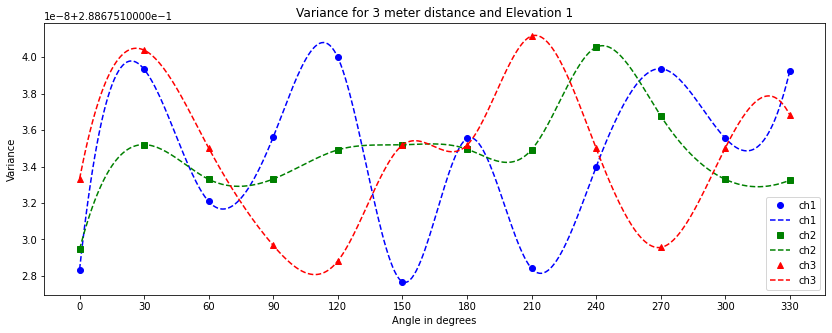

In [47]:
# For 3 Meter Elevation 1
directorySound_content = os.listdir("/home/prabhjot/Desktop/SoundData/TroyCenter_LargeConfRoom")
directorySound = os.fsencode("/home/prabhjot/Desktop/SoundData/TroyCenter_LargeConfRoom")

index = directorySound_content.index('3Meter_Elevation1')
_3MeterFolderPathElv1 = (os.path.join(directorySound.decode("utf-8"),directorySound_content[index] ))

_3MeterFolderPathElv1_content = os.listdir(_3MeterFolderPathElv1)

Angle = []
ch1_Var = []
ch2_Var = []
ch3_Var = []
RawAudio_Var = []

for i in range(0,len(_3MeterFolderPathElv1_content)):
    subdir = (os.path.join(_3MeterFolderPathElv1,_3MeterFolderPathElv1_content[i]))
    #print(subdir)
    with open(os.path.join(subdir,'angle.txt')) as f:
        read_data = f.read()
    Angle.append(int(read_data[0:-1]))
    
    #Read the audio files
    ch1, sfreq = lr.load(os.path.join(subdir, 'ch1.wav'), sr=44100)
    ch2, sfreq = lr.load(os.path.join(subdir, 'ch2.wav'), sr=44100)
    ch3, sfreq = lr.load(os.path.join(subdir, 'ch3.wav'), sr=44100)
    RawAudio, sfreq =  lr.load("AUGUST_1_raw.wav", sr=44100)
       
    ###### Change to signal to a fixed length of 2sec
    ch1_fixedLength = librosa.util.fix_length(ch1, 2*sfreq)
    ch2_fixedLength = librosa.util.fix_length(ch2, 2*sfreq)
    ch3_fixedLength = librosa.util.fix_length(ch3, 2*sfreq)
    RawAudio_fixedLength = librosa.util.fix_length(RawAudio, 2*sfreq)

    ###### Convert the signal to a Zero mean signal
    ch1_ZeroMean=x_fixedLength-np.mean(ch1_fixedLength)
    ch2_ZeroMean=x_fixedLength-np.mean(ch2_fixedLength)
    ch3_ZeroMean=x_fixedLength-np.mean(ch3_fixedLength)
    RawAudio_ZeroMean=x_fixedLength-np.mean(RawAudio_fixedLength)
        
    ###### Calculate variance for the Zero mean signal
    ch1_Variance = np.var(ch1_ZeroMean, dtype=np.float64)
    ch2_Variance = np.var(ch2_ZeroMean, dtype=np.float64)
    ch3_Variance = np.var(ch3_ZeroMean, dtype=np.float64)
    RawAudio_Variance = np.var(RawAudio_ZeroMean, dtype=np.float64)
    
    ch1_Var.append(ch1_Variance)
    ch2_Var.append(ch2_Variance)
    ch3_Var.append(ch3_Variance)
    RawAudio_Var.append(RawAudio_Variance)
    
##### Normlaize the Variance vector
ch1_Var =  preprocessing.normalize([ch1_Var])
ch2_Var =  preprocessing.normalize([ch2_Var])
ch3_Var =  preprocessing.normalize([ch3_Var])
RawAudio_Var =  preprocessing.normalize([RawAudio_Var])
ch1_Var =  ch1_Var[0]
ch2_Var =  ch2_Var[0]
ch3_Var =  ch3_Var[0]
RawAudio_Var =  RawAudio_Var[0]

print(Angle)
print(ch1_Var)
print(ch2_Var)
print(ch3_Var)
print(RawAudio_Var)

plt.figure(figsize=(14, 5))
ch1_Var_interpolate = interp1d(Angle, ch1_Var, kind='cubic')
Angle_interpolate = np.linspace(0, 330, num=330, endpoint=True)
plt.plot(Angle, ch1_Var, 'bo', Angle_interpolate,ch1_Var_interpolate(Angle_interpolate), 'b--' , label="ch1")
plt.xticks([0,30,60,90,120,150,180,210,240,270,300,330,360])    

ch2_Var_interpolate = interp1d(Angle, ch2_Var, kind='cubic')
Angle_interpolate = np.linspace(0, 330, num=330, endpoint=True)
plt.plot(Angle, ch2_Var, 'gs', Angle_interpolate,ch2_Var_interpolate(Angle_interpolate), 'g--', label="ch2")

ch3_Var_interpolate = interp1d(Angle, ch3_Var, kind='cubic')
Angle_interpolate = np.linspace(0, 330, num=330, endpoint=True)
plt.plot(Angle, ch3_Var, 'r^', Angle_interpolate,ch3_Var_interpolate(Angle_interpolate), 'r--', label="ch3")

plt.xlabel('Angle in degrees')
plt.ylabel('Variance')
plt.title('Variance for 3 meter distance and Elevation 1')
plt.legend()